
Found 3257 images belonging to 5 classes.
Found 375 images belonging to 5 classes.
Found 375 images belonging to 5 classes.


Epoch 1/10


204/204 [==============================] - 529s 3s/step - loss: 9.6239 - accuracy: 0.6454 - val_loss: 0.8901 - val_accuracy: 0.7680
Epoch 2/10
204/204 [==============================] - 529s 3s/step - loss: 1.3519 - accuracy: 0.7777 - val_loss: 0.5362 - val_accuracy: 0.7627
Epoch 3/10
204/204 [==============================] - 501s 2s/step - loss: 0.6365 - accuracy: 0.8090 - val_loss: 0.3097 - val_accuracy: 0.8613
Epoch 4/10
204/204 [==============================] - 474s 2s/step - loss: 0.4793 - accuracy: 0.8072 - val_loss: 0.2642 - val_accuracy: 0.8987
Epoch 5/10
204/204 [==============================] - 475s 2s/step - loss: 0.4473 - accuracy: 0.8170 - val_loss: 0.3065 - val_accuracy: 0.8693
Epoch 6/10
204/204 [==============================] - 479s 2s/step - loss: 0.4305 - accuracy: 0.8281 - val_loss: 0.3464 - val_accuracy: 0.8853
Epoch 7/10
20

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to C:\Users\ASUS\Desktop\fyp code\Ganesh Rapal\Rice-Dataset\inception_epoch10_batch16_accuracy92.h5


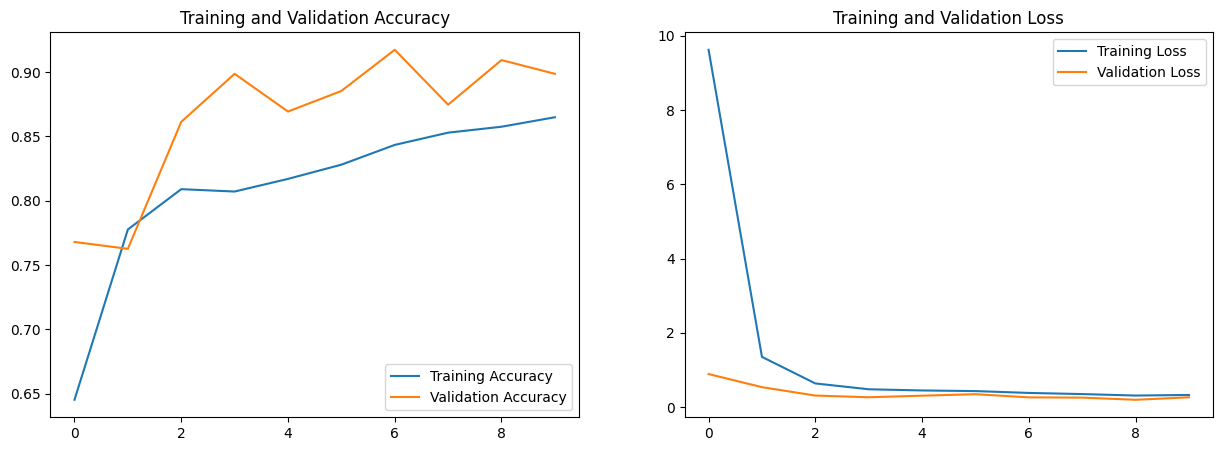

24/24 [==============================] - 19s 764ms/step
Confusion Matrix
[[75  0  0  0  0]
 [ 1 74  0  0  0]
 [ 0  0 72  3  0]
 [ 1  0 18 56  0]
 [ 0  0  3 11 61]]


NameError: name 'target_names' is not defined

<Figure size 800x600 with 0 Axes>

In [1]:
import os
import glob
import shutil

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout, Dense, Activation
from keras import regularizers
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Constants
BATCH_SIZE = 16
IMG_HEIGHT = 299
IMG_WIDTH = 299
EPOCH = 10

# Data directories
train_data_dir = os.path.join(os.getcwd(), 'train')
validation_data_dir = os.path.join(os.getcwd(), 'validation')
test_data_dir = os.path.join(os.getcwd(), 'test')

# Data generators
image_train_gen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    rotation_range=45,
    horizontal_flip=True,
    width_shift_range=0.15,
    height_shift_range=0.15
)

train_data_gen = image_train_gen.flow_from_directory(
    train_data_dir,
    batch_size=BATCH_SIZE,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical'
)

img_val_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = img_val_gen.flow_from_directory(
    validation_data_dir,
    shuffle=False,
    batch_size=BATCH_SIZE,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical'
)

test_data_gen = img_val_gen.flow_from_directory(
    test_data_dir,
    shuffle=False,
    batch_size=BATCH_SIZE,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical'
)

# Define the InceptionV3 model
inception_model = Sequential()
pretrained_model = InceptionV3(
    include_top=False,
    input_shape=(299, 299, 3),
    pooling='None',
    classes=5,
    weights='imagenet'
)

for layer in pretrained_model.layers:
    layer.trainable=False

inception_model.add(pretrained_model)
inception_model.add(Flatten())
inception_model.add(Dense(1024, activation='relu'))
inception_model.add(Dropout(0.5))
inception_model.add(Dense(512, activation='relu'))
inception_model.add(Dropout(0.3))
inception_model.add(Dense(256, activation='relu'))
inception_model.add(Dense(5, activation='softmax'))

inception_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = inception_model.fit(train_data_gen, validation_data=val_data_gen, epochs=EPOCH)



In [10]:
# Print Classification Report
print('Classification Report')
target_names = ['Basmati', 'Invalid-Rice', 'Jeera Maseeno', 'Mansuli', 'Pokhrali']
class_rep_res = classification_report(val_data_gen.classes, y_pred_res, target_names=target_names)
print(class_rep_res)


Classification Report
               precision    recall  f1-score   support

      Basmati       0.97      1.00      0.99        75
 Invalid-Rice       1.00      0.99      0.99        75
Jeera Maseeno       0.77      0.96      0.86        75
      Mansuli       0.80      0.75      0.77        75
     Pokhrali       1.00      0.81      0.90        75

     accuracy                           0.90       375
    macro avg       0.91      0.90      0.90       375
 weighted avg       0.91      0.90      0.90       375

